In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
reason_df = pd.read_csv('reason.csv')

In [3]:
reason_df

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [4]:
# Initial Data Inspection
print(reason_df.info())  # To check column types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
None


In [5]:
print(reason_df.describe())  # Summary statistics for numeric columns (if applicable)

            call_id
count  6.665300e+04
mean   4.993883e+09
std    2.889665e+09
min    1.316420e+05
25%    2.481353e+09
50%    4.987649e+09
75%    7.495496e+09
max    9.999806e+09


In [6]:
print(reason_df.isnull().sum())  # Check for null values

call_id                0
primary_call_reason    0
dtype: int64


In [7]:
# Drop columns with a high number of nulls (if any)
reason_df_cleaned = reason_df.dropna(axis=1, thresh=int(0.6 * len(reason_df)))  # Keeping columns with 60% non-null values

In [8]:
# Drop rows with any null values (if needed)
reason_df_cleaned = reason_df_cleaned.dropna()

In [9]:
# Check cleaned dataset
print(reason_df_cleaned.isnull().sum())


call_id                0
primary_call_reason    0
dtype: int64


In [10]:
# Normalize the primary call reasons by converting to lowercase and trimming whitespace
reason_df_cleaned['normalized_reason'] = reason_df_cleaned['primary_call_reason'].str.lower().str.strip()

# Count occurrences of each normalized primary call reason
normalized_reason_counts = reason_df_cleaned['normalized_reason'].value_counts()



/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_20603/787209308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_reason_counts.index, y=normalized_reason_counts.values, palette='viridis')


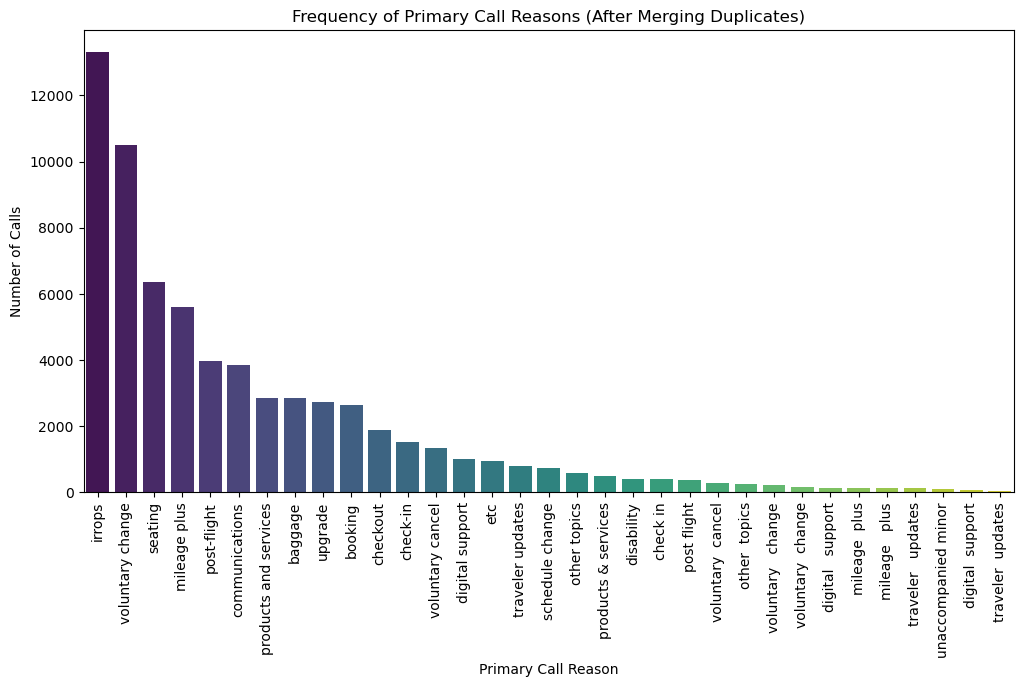

In [11]:
# Visualize with a Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=normalized_reason_counts.index, y=normalized_reason_counts.values, palette='viridis')
plt.title('Frequency of Primary Call Reasons (After Merging Duplicates)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


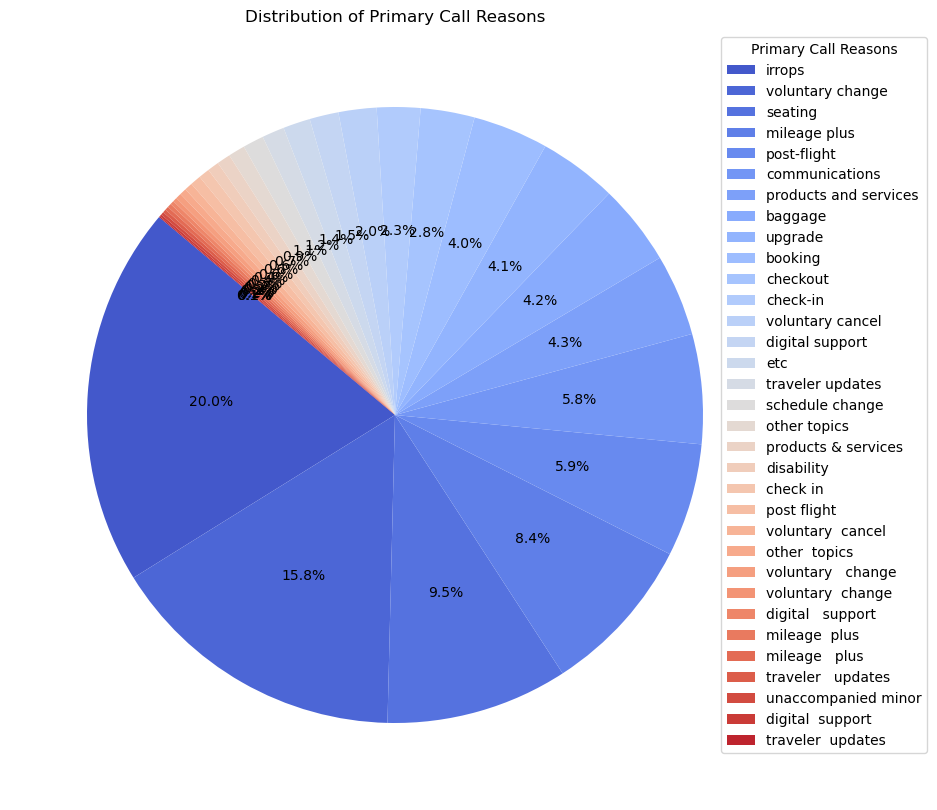

In [12]:
# Set up colors for each unique reason
colors = sns.color_palette("coolwarm", len(normalized_reason_counts))

# Create a pie chart to visualize the distribution of primary call reasons
plt.figure(figsize=(10, 10))
plt.pie(normalized_reason_counts, 
        labels=None,  # We will add labels via the legend
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

# Add a title
plt.title('Distribution of Primary Call Reasons')

# Create a legend to display the reasons with their colors
plt.legend(labels=normalized_reason_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1), title='Primary Call Reasons')

# Show the plot
plt.show()



/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_20603/2780595510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(y=normalized_reason_counts.index, x=normalized_reason_counts.values, palette='Blues_d')


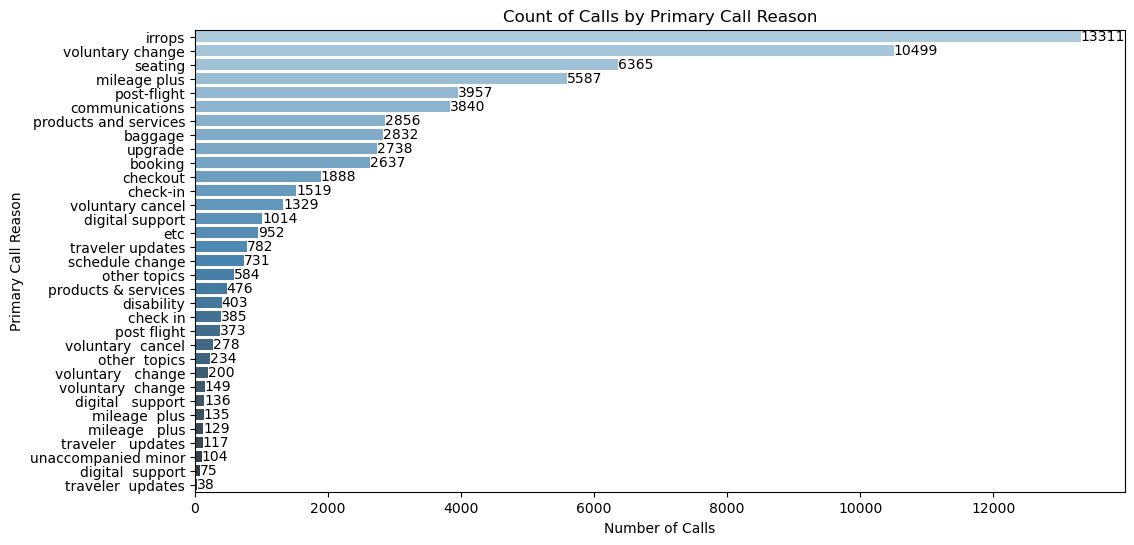

In [13]:
# Create a horizontal bar plot to visualize the frequency of each primary call reason
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(y=normalized_reason_counts.index, x=normalized_reason_counts.values, palette='Blues_d')

# Add title and labels
plt.title('Count of Calls by Primary Call Reason')
plt.xlabel('Number of Calls')
plt.ylabel('Primary Call Reason')

# Annotate the bars with their corresponding counts
for index, value in enumerate(normalized_reason_counts.values):
    bar_plot.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()
